In [226]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, silhouette_score, accuracy_score, mean_absolute_error, cohen_kappa_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, HDBSCAN
from sklearn.cluster import DBSCAN
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, randint
from sklearn.neighbors import NearestNeighbors
import plotly.express as px


In [227]:
df = pd.read_csv("updated_pollution_dataset.csv")

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [229]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,5000.0,30.029020,6.720661,13.40,25.10,29.00,34.000,58.60
Humidity,5000.0,70.056120,15.863577,36.00,58.30,69.80,80.300,128.10
PM2.5,5000.0,20.142140,24.554546,0.00,4.60,12.00,26.100,295.00
PM10,5000.0,30.218360,27.349199,-0.20,12.30,21.70,38.100,315.80
NO2,5000.0,26.412100,8.895356,7.40,20.10,25.30,31.900,64.90
SO2,5000.0,10.014820,6.750303,-6.20,5.10,8.00,13.725,44.90
CO,5000.0,1.500354,0.546027,0.65,1.03,1.41,1.840,3.72
Proximity_to_Industrial_Areas,5000.0,8.425400,3.610944,2.50,5.40,7.90,11.100,25.80
Population_Density,5000.0,497.423800,152.754084,188.00,381.00,494.00,600.000,957.00


In [230]:
X = df.drop(["Air Quality"], axis=1)
y = df["Air Quality"]

In [231]:
correlation_matrix = X.corr()
print(correlation_matrix)

                               Temperature  Humidity     PM2.5      PM10  \
Temperature                       1.000000  0.466456  0.323840  0.425690   
Humidity                          0.466456  1.000000  0.273366  0.359156   
PM2.5                             0.323840  0.273366  1.000000  0.973005   
PM10                              0.425690  0.359156  0.973005  1.000000   
NO2                               0.591969  0.491977  0.333004  0.439916   
SO2                               0.568082  0.459804  0.299582  0.401849   
CO                                0.685258  0.567540  0.395179  0.518895   
Proximity_to_Industrial_Areas    -0.589564 -0.479646 -0.315766 -0.425018   
Population_Density                0.481692  0.411630  0.278957  0.365734   

                                    NO2       SO2        CO  \
Temperature                    0.591969  0.568082  0.685258   
Humidity                       0.491977  0.459804  0.567540   
PM2.5                          0.333004  0.299582 

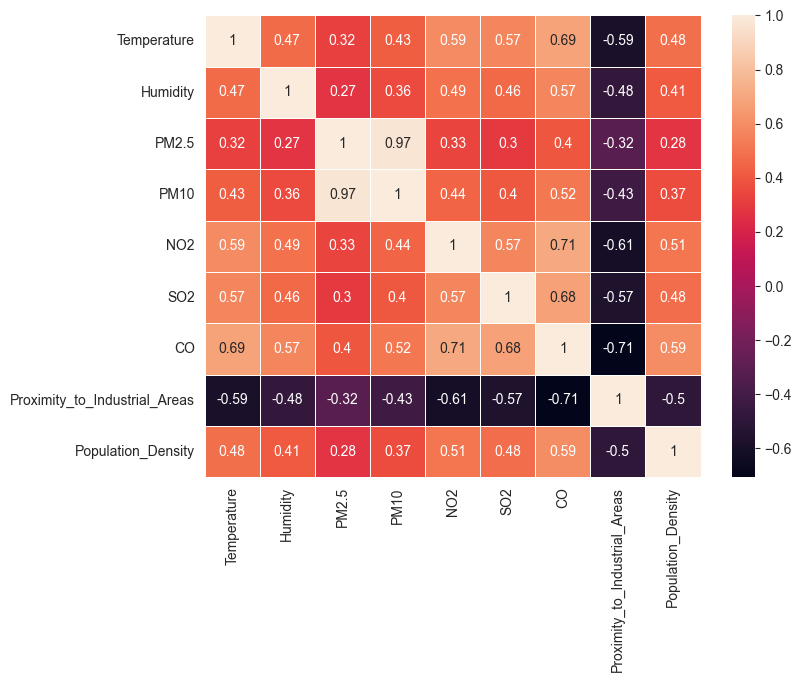

In [232]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, linewidth=.7)
plt.show()

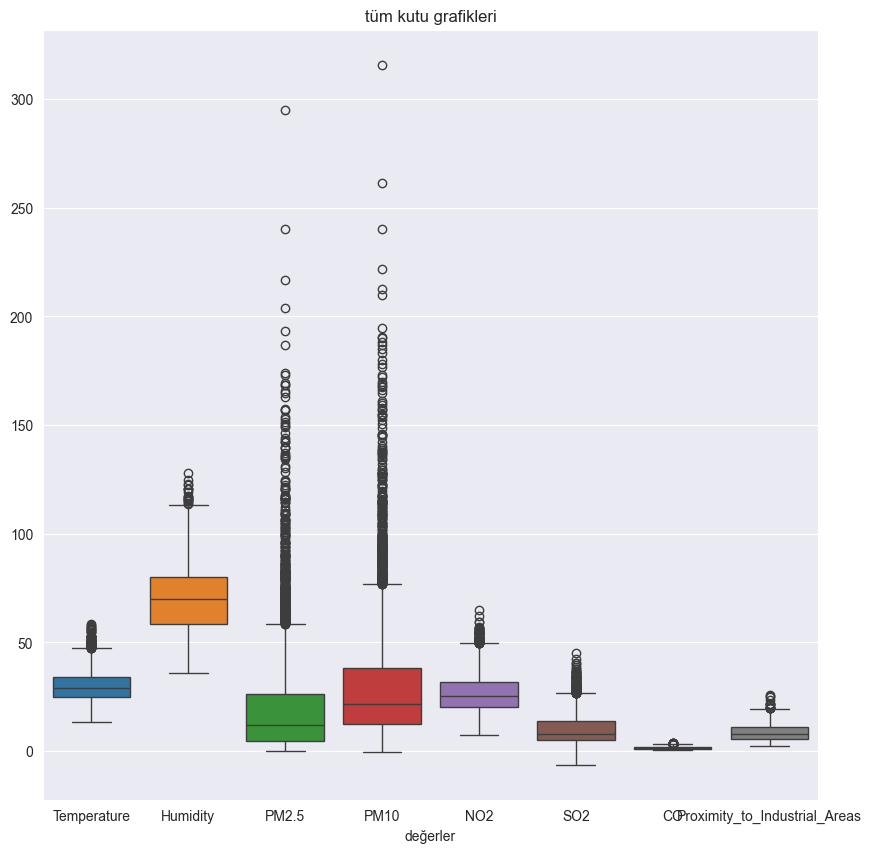

In [233]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df[["Temperature", "Humidity", "PM2.5", "PM10" , "NO2", "SO2", "CO", "Proximity_to_Industrial_Areas"]])
plt.title("tüm kutu grafikleri")
plt.xlabel("değerler")
plt.show()

In [234]:
target_counts = y.value_counts()
print(target_counts)
print(target_counts / len(df) * 100)  # Yüzdelik dağılım


Air Quality
Good         2000
Moderate     1500
Poor         1000
Hazardous     500
Name: count, dtype: int64
Air Quality
Good         40.0
Moderate     30.0
Poor         20.0
Hazardous    10.0
Name: count, dtype: float64


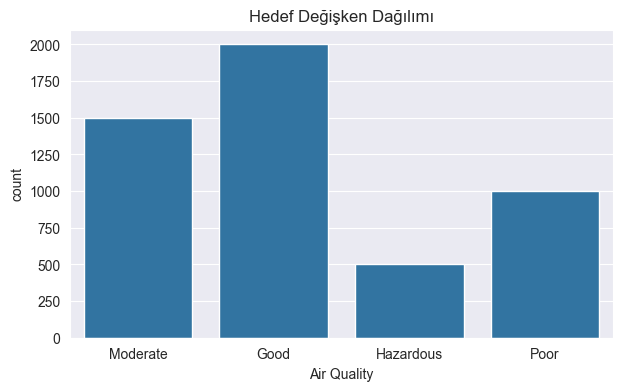

In [235]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Air Quality')
plt.title('Hedef Değişken Dağılımı')
plt.show()

In [236]:
quality = [['Hazardous', 'Poor', 'Moderate', 'Good']]

In [249]:
y_ordinal = OrdinalEncoder(categories=quality)
y = y_ordinal.fit_transform(df[["Air Quality"]])


[array(['Hazardous', 'Poor', 'Moderate', 'Good'], dtype=object)]


In [238]:
scaler = StandardScaler()

In [239]:
X_scaled = scaler.fit_transform(X)

In [240]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,-0.034080,-0.690715,-0.608589,-0.450455,-0.844581,-0.120721,0.402303,-0.588658,-1.168163
1,-0.257295,0.349507,-0.726706,-0.658892,0.493329,-0.046643,0.255775,-0.671748,0.743598
2,-1.031106,0.292768,0.267100,0.130973,-0.226219,0.383011,0.237459,-0.893318,0.795975
3,-0.435867,-1.951591,-0.571933,-0.874642,-1.451700,-0.698530,-0.641707,0.740767,0.350770
4,-0.525153,0.040593,-0.539349,-0.519934,-0.507293,-0.654083,-0.898130,1.183909,-1.272917


In [241]:
#outlier_mask = (np.abs(X_scaled) > 6).any(axis=1)
combined_mask = ((np.abs(X_scaled) > 3).any(axis=1)) # | mask_2 | mask_3
X_scaled = X_scaled[~combined_mask]
y = y[~combined_mask]


In [242]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [243]:
smote = SMOTE(random_state=42)
x_balanced, y_balanced = smote.fit_resample(X_scaled_df, y)

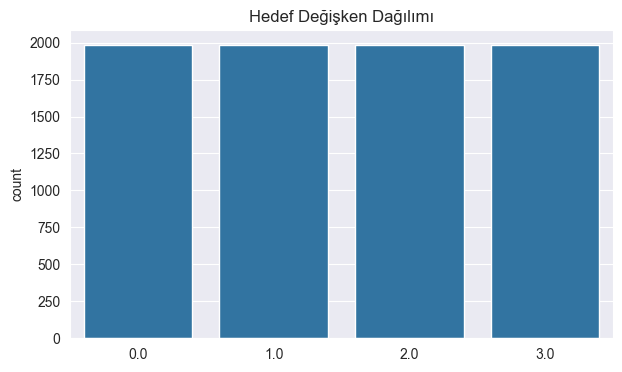

In [256]:
plt.figure(figsize=(7,4))
sns.countplot(x=y_balanced)
plt.title('Hedef Değişken Dağılımı')
plt.show()

In [260]:
x_balanced.head(5)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,-0.034080,-0.690715,-0.608589,-0.450455,-0.844581,-0.120721,0.402303,-0.588658,-1.168163
1,-0.257295,0.349507,-0.726706,-0.658892,0.493329,-0.046643,0.255775,-0.671748,0.743598
2,-1.031106,0.292768,0.267100,0.130973,-0.226219,0.383011,0.237459,-0.893318,0.795975
3,-0.435867,-1.951591,-0.571933,-0.874642,-1.451700,-0.698530,-0.641707,0.740767,0.350770
4,-0.525153,0.040593,-0.539349,-0.519934,-0.507293,-0.654083,-0.898130,1.183909,-1.272917


In [255]:
print("İlk 20 eleman y:", y_balanced[:20])

İlk 20 eleman y: [2. 2. 2. 3. 3. 0. 1. 2. 1. 1. 3. 2. 3. 3. 3. 2. 3. 1. 2. 1.]


In [254]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(x_balanced)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_balanced, test_size=0.2, random_state=42)

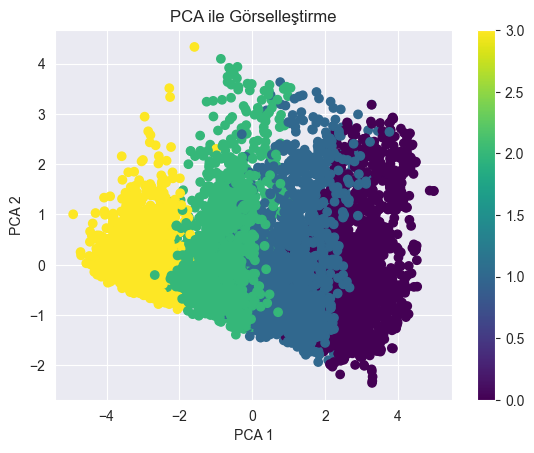

In [143]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_balanced, cmap='viridis')  # y_balanced etiket olarak
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA ile Görselleştirme')
plt.colorbar()
plt.show()


In [144]:
# DataFrame
df_tsne = pd.DataFrame({
    'tsne1': X_reduced[:, 0],
    'tsne2': X_reduced[:, 1],
    'tsne3': X_reduced[:, 2],
    'label': y_balanced
})

# Etkileşimli 3B scatter plot
fig = px.scatter_3d(df_tsne, x='tsne1', y='tsne2', z='tsne3',
                    color=y_balanced,
                    title='3 Boyutlu t-SNE Görselleştirmesi',
                    labels={'tsne1': 't-SNE Boyut 1',
                            'tsne2': 't-SNE Boyut 2',
                            'tsne3': 't-SNE Boyut 3'},
                    color_continuous_scale='viridis')

fig.update_layout(
    width=500,  # piksel cinsinden genişlik
    height=500, # piksel cinsinden yükseklik
    autosize=False  # otomatik boyutlandırmayı kapat
)

fig.write_image("3d_tsne_gorseli.png")


fig.show()

LOGISTIC REGRESSION

In [264]:
param_grid =[ {
    'estimator__C': [0.01, 0.1, 1, 10, 100],
    'estimator__penalty': ['l1', 'l2'],
    'estimator__solver': ['saga']
},
{'estimator__C': [0.01, 0.1, 1, 10, 100],
     'estimator__penalty': ['elasticnet'],
     'estimator__solver': ['saga'],
     'estimator__l1_ratio': [0.2, 0.5, 0.8]} ]

reg = OneVsRestClassifier(LogisticRegression(max_iter=5000))
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='roc_auc_ovr', n_jobs=-1)
grid_search.fit(X_train, y_train)

,estimator,OneVsRestClas...ax_iter=5000))
,param_grid,"[{'estimator__C': [0.01, 0.1, ...], 'estimator__penalty': ['l1', 'l2'], 'estimator__solver': ['saga']}, {'estimator__C': [0.01, 0.1, ...], 'estimator__l1_ratio': [0.2, 0.5, ...], 'estimator__penalty': ['elasticnet'], 'estimator__solver': ['saga']}]"
,scoring,'roc_auc_ovr'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [265]:
print("En iyi hiperparametreler:", grid_search.best_params_)
print("En iyi ROC AUC skoru:", grid_search.best_score_)

# En iyi modeli kullanın
model = grid_search.best_estimator_

En iyi hiperparametreler: {'estimator__C': 100, 'estimator__penalty': 'l1', 'estimator__solver': 'saga'}
En iyi ROC AUC skoru: 0.9527089129755861


In [147]:
#PREDICT
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#ROC AUC için olasılık predict
y_pred_proba_train = model.predict_proba(X_train)
y_pred_proba_test = model.predict_proba(X_test)

In [148]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Eğitim Verisi Doğruluğu (Training Accuracy): {train_accuracy:.4f}")
print(f"Test Verisi Doğruluğu (Testing Accuracy): {test_accuracy:.4f}")

Eğitim Verisi Doğruluğu (Training Accuracy): 0.8469
Test Verisi Doğruluğu (Testing Accuracy): 0.8451


In [149]:
train_roc_auc = roc_auc_score(y_train, y_pred_proba_train, multi_class='ovr')
test_roc_auc = roc_auc_score(y_test, y_pred_proba_test, multi_class='ovr')
print(f"Eğitim Verisi ROC AUC Skoru: {train_roc_auc:.4f}")
print(f"Test Verisi ROC AUC Skoru: {test_roc_auc:.4f}")

Eğitim Verisi ROC AUC Skoru: 0.9549
Test Verisi ROC AUC Skoru: 0.9581


In [150]:
print("\n--- Sınıflandırma Raporu ---")
print(classification_report(y_test, y_pred_test))


--- Sınıflandırma Raporu ---
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86       348
         1.0       0.77      0.63      0.69       422
         2.0       0.79      0.86      0.82       390
         3.0       0.99      1.00      0.99       428

    accuracy                           0.85      1588
   macro avg       0.84      0.85      0.84      1588
weighted avg       0.84      0.85      0.84      1588



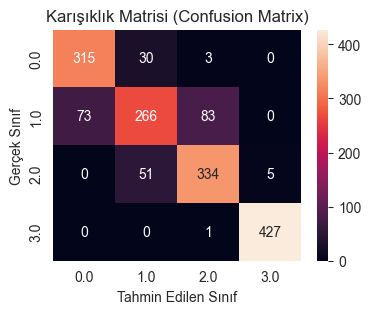

In [151]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Karışıklık Matrisi (Confusion Matrix)')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

In [152]:
mae_lr = mean_absolute_error(y_test, y_pred_test)

print(f"MAE: {mae_lr:.4f}")

MAE: 0.1568
QWK: 0.9358


Decision Tree

In [153]:
tree = DecisionTreeClassifier(random_state=42)
model = tree.fit(X_train, y_train)

param_grid = {
    'max_depth': [3, 5, 10, 15, 20, None]
}
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='roc_auc_ovr', n_jobs=-1)


In [154]:
model_tree = grid_search.fit(X_train, y_train)


In [155]:
print("--- Grid Search for Decision Tree ---")
print(f"En İyi Parametreler: {model_tree.best_params_}")
print(f"En İyi ROC AUC Skoru: {model_tree.best_score_:.4f}")


--- Grid Search for Decision Tree ---
En İyi Parametreler: {'max_depth': 5}
En İyi ROC AUC Skoru: 0.9718


In [156]:
model = model_tree.best_estimator_

In [157]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

y_pred_proba_train = model.predict_proba(X_train)
y_pred_proba_test = model.predict_proba(X_test)

In [158]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Eğitim Verisi Doğruluğu (Training Accuracy): {train_accuracy:.4f}")
print(f"Test Verisi Doğruluğu (Testing Accuracy): {test_accuracy:.4f}")

Eğitim Verisi Doğruluğu (Training Accuracy): 0.8855
Test Verisi Doğruluğu (Testing Accuracy): 0.8942


In [159]:
train_roc_auc = roc_auc_score(y_train, y_pred_proba_train, multi_class='ovr')
test_roc_auc = roc_auc_score(y_test, y_pred_proba_test, multi_class='ovr')
print(f"Eğitim Verisi ROC AUC Skoru: {train_roc_auc:.4f}")
print(f"Test Verisi ROC AUC Skoru: {test_roc_auc:.4f}")

Eğitim Verisi ROC AUC Skoru: 0.9767
Test Verisi ROC AUC Skoru: 0.9736


In [160]:
print("\n--- Sınıflandırma Raporu ---")
print(classification_report(y_test, y_pred_test))


--- Sınıflandırma Raporu ---
              precision    recall  f1-score   support

         0.0       0.92      0.80      0.85       348
         1.0       0.79      0.86      0.82       422
         2.0       0.90      0.91      0.91       390
         3.0       0.99      0.99      0.99       428

    accuracy                           0.89      1588
   macro avg       0.90      0.89      0.89      1588
weighted avg       0.90      0.89      0.89      1588



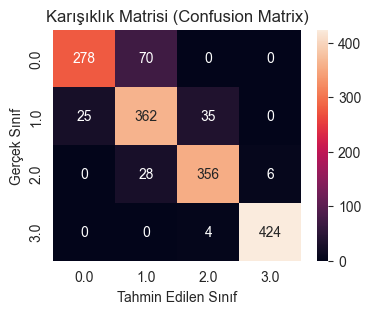

In [161]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Karışıklık Matrisi (Confusion Matrix)')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

In [162]:
mae_dt = mean_absolute_error(y_test, y_pred_test)

print(f"MAE: {mae_dt:.4f}")

MAE: 0.1058
QWK: 0.9557


RANDOM FOREST

In [163]:
rf = RandomForestClassifier(random_state=42)

In [164]:
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, None],
}

In [165]:
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc_ovr', n_jobs=-1)

In [166]:
model_rf = grid_search_rf.fit(X_train, y_train)

In [167]:
print("--- Rastgele Orman için Grid Search Sonuçları ---")
print(f"En İyi Parametreler: {model_rf.best_params_}")
print(f"En İyi ROC AUC Skoru: {model_rf.best_score_:.4f}")

--- Rastgele Orman için Grid Search Sonuçları ---
En İyi Parametreler: {'max_depth': None, 'n_estimators': 300}
En İyi ROC AUC Skoru: 0.9936


In [168]:
model = model_rf.best_estimator_


In [169]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

y_pred_proba_train = model.predict_proba(X_train)
y_pred_proba_test = model.predict_proba(X_test)

In [170]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Eğitim Verisi Doğruluğu (Training Accuracy): {train_accuracy:.4f}")
print(f"Test Verisi Doğruluğu (Testing Accuracy): {test_accuracy:.4f}")

Eğitim Verisi Doğruluğu (Training Accuracy): 1.0000
Test Verisi Doğruluğu (Testing Accuracy): 0.9565


In [171]:
train_roc_auc = roc_auc_score(y_train, y_pred_proba_train, multi_class='ovr')
test_roc_auc = roc_auc_score(y_test, y_pred_proba_test, multi_class='ovr')
print(f"Eğitim Verisi ROC AUC Skoru: {train_roc_auc:.4f}")
print(f"Test Verisi ROC AUC Skoru: {test_roc_auc:.4f}")

Eğitim Verisi ROC AUC Skoru: 1.0000
Test Verisi ROC AUC Skoru: 0.9958


In [172]:
print("\n--- Sınıflandırma Raporu ---")
print(classification_report(y_test, y_pred_test))


--- Sınıflandırma Raporu ---
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       348
         1.0       0.93      0.91      0.92       422
         2.0       0.94      0.96      0.95       390
         3.0       1.00      0.99      1.00       428

    accuracy                           0.96      1588
   macro avg       0.96      0.96      0.96      1588
weighted avg       0.96      0.96      0.96      1588



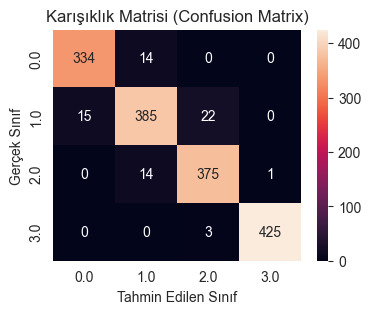

In [173]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Karışıklık Matrisi (Confusion Matrix)')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

In [174]:
mae_rf = mean_absolute_error(y_test, y_pred_test)

print(f"MAE: {mae_rf:.4f}")

MAE: 0.0435
QWK: 0.9822


SVM(SVC)

In [175]:
svc_model = OneVsRestClassifier(SVC(probability=True, random_state=42))

In [176]:
param_distributions_svc = {
    'estimator__C': reciprocal(0.01, 1000),
    'estimator__kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

In [177]:
random_search_svc = RandomizedSearchCV(svc_model, param_distributions_svc, n_iter=10 ,cv=5, scoring='roc_auc_ovr', n_jobs=-1, random_state=42)

In [178]:
model_sv = random_search_svc.fit(X_train, y_train)

In [179]:
print("--- SVC için Grid Search Sonuçları ---")
print(f"En İyi Parametreler: {model_sv.best_params_}")
print(f"En İyi ROC AUC Skoru: {model_sv.best_score_:.4f}")

--- SVC için Grid Search Sonuçları ---
En İyi Parametreler: {'estimator__C': np.float64(145.28246637516014), 'estimator__kernel': 'rbf'}
En İyi ROC AUC Skoru: 0.9918


In [180]:
model = model_sv.best_estimator_

In [181]:
#PREDICT
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#ROC AUC için olasılık predict
y_pred_proba_train = model.predict_proba(X_train)
y_pred_proba_test = model.predict_proba(X_test)

In [182]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Eğitim Verisi Doğruluğu (Training Accuracy): {train_accuracy:.4f}")
print(f"Test Verisi Doğruluğu (Testing Accuracy): {test_accuracy:.4f}")

Eğitim Verisi Doğruluğu (Training Accuracy): 0.9715
Test Verisi Doğruluğu (Testing Accuracy): 0.9603


In [183]:
train_roc_auc = roc_auc_score(y_train, y_pred_proba_train, multi_class='ovr')
test_roc_auc = roc_auc_score(y_test, y_pred_proba_test, multi_class='ovr')
print(f"Eğitim Verisi ROC AUC Skoru: {train_roc_auc:.4f}")
print(f"Test Verisi ROC AUC Skoru: {test_roc_auc:.4f}")

Eğitim Verisi ROC AUC Skoru: 0.9976
Test Verisi ROC AUC Skoru: 0.9945


In [184]:
print("\n--- Sınıflandırma Raporu ---")
print(classification_report(y_test, y_pred_test))


--- Sınıflandırma Raporu ---
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       348
         1.0       0.95      0.91      0.93       422
         2.0       0.95      0.97      0.96       390
         3.0       1.00      1.00      1.00       428

    accuracy                           0.96      1588
   macro avg       0.96      0.96      0.96      1588
weighted avg       0.96      0.96      0.96      1588



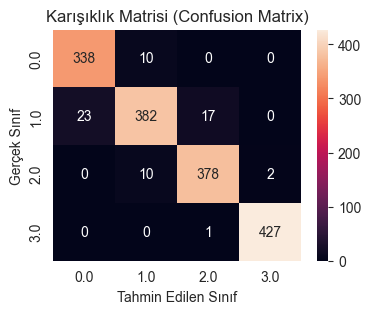

In [185]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Karışıklık Matrisi (Confusion Matrix)')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

In [186]:
mae_svc = mean_absolute_error(y_test, y_pred_test)

print(f"MAE: {mae_svc:.4f}")

MAE: 0.0397
QWK: 0.9839


KNN

In [187]:
knn_model = KNeighborsClassifier()

In [188]:
param_distributions_knn = {
    'n_neighbors': randint(1, 21),  # 1'den 20'ye kadar rastgele bir sayı seç
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [189]:
random_search_knn = RandomizedSearchCV(knn_model, param_distributions_knn, n_iter=50, cv=5, scoring='roc_auc_ovr', n_jobs=-1, random_state=42)

In [190]:
model = random_search_knn.fit(X_train, y_train)

In [191]:
print("--- KNN için Randomized Search Sonuçları ---")
print(f"En İyi Parametreler: {model.best_params_}")
print(f"En İyi ROC AUC Skoru: {model.best_score_:.4f}")

--- KNN için Randomized Search Sonuçları ---
En İyi Parametreler: {'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
En İyi ROC AUC Skoru: 0.9946


In [192]:
best_knn_model = model.best_estimator_

In [193]:
y_pred_train = best_knn_model.predict(X_train)
y_pred_test = best_knn_model.predict(X_test)
y_pred_proba_train = best_knn_model.predict_proba(X_train)
y_pred_proba_test = best_knn_model.predict_proba(X_test)

In [194]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"\nEğitim Verisi Doğruluğu (Training Accuracy): {train_accuracy:.4f}")
print(f"Test Verisi Doğruluğu (Testing Accuracy): {test_accuracy:.4f}")


Eğitim Verisi Doğruluğu (Training Accuracy): 1.0000
Test Verisi Doğruluğu (Testing Accuracy): 0.9578


In [195]:
train_roc_auc = roc_auc_score(y_train, y_pred_proba_train, multi_class='ovr')
test_roc_auc = roc_auc_score(y_test, y_pred_proba_test, multi_class='ovr')
print(f"Eğitim Verisi ROC AUC Skoru: {train_roc_auc:.4f}")
print(f"Test Verisi ROC AUC Skoru: {test_roc_auc:.4f}")

Eğitim Verisi ROC AUC Skoru: 1.0000
Test Verisi ROC AUC Skoru: 0.9965


In [196]:
print("\n--- Sınıflandırma Raporu ---")
print(classification_report(y_test, y_pred_test))


--- Sınıflandırma Raporu ---
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       348
         1.0       0.97      0.88      0.92       422
         2.0       0.95      0.97      0.96       390
         3.0       0.99      1.00      0.99       428

    accuracy                           0.96      1588
   macro avg       0.96      0.96      0.96      1588
weighted avg       0.96      0.96      0.96      1588



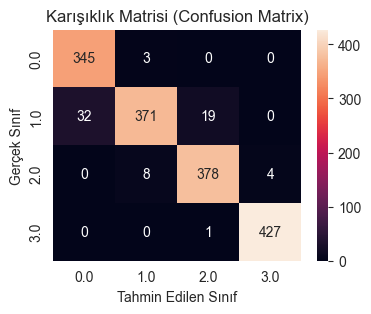

In [197]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Karışıklık Matrisi (Confusion Matrix)')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

In [198]:
mae_knn = mean_absolute_error(y_test, y_pred_test)

print(f"MAE: {mae_knn:.4f}")

MAE: 0.0422
QWK: 0.9830


In [199]:
#elbow metodu
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [200]:
wcss

[53836.782795792846,
 29672.827896215767,
 24240.15646080432,
 21358.766612792115,
 19937.123610296472,
 18794.572199955765,
 17984.53799088517,
 17810.12339051781,
 17195.06365458198,
 16212.06511596257]

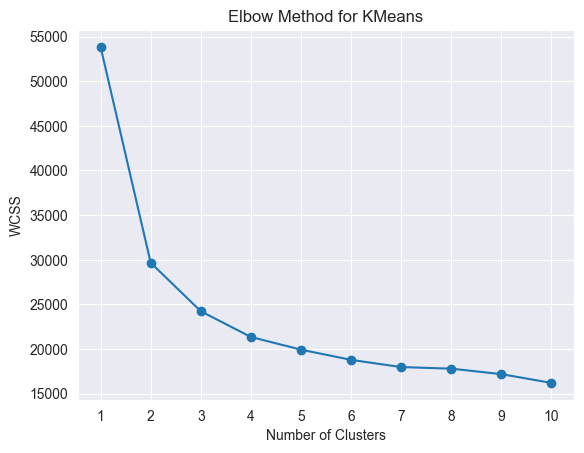

In [201]:
plt.plot(range(1, 11), wcss, marker="o")
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for KMeans")
plt.show()


In [202]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_train)

# PCA ile görselleştirme
pca_vis = PCA(n_components=3)
X_vis = pca_vis.fit_transform(X_train)


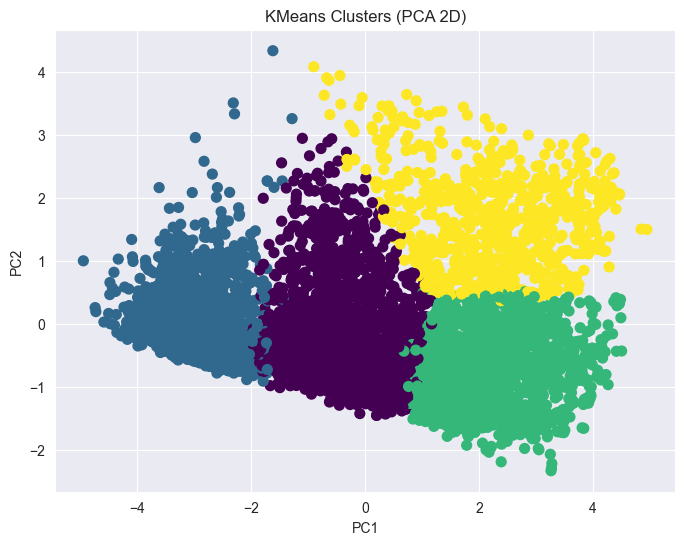

In [203]:
plt.figure(figsize=(8,6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=clusters_kmeans, cmap="viridis", s=50)
plt.title("KMeans Clusters (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [204]:
skor = silhouette_score(X_train, clusters_kmeans)
print(skor)

0.24876290125971195


In [205]:
X_tsne = TSNE(n_components=3, random_state=42).fit_transform(X_train)

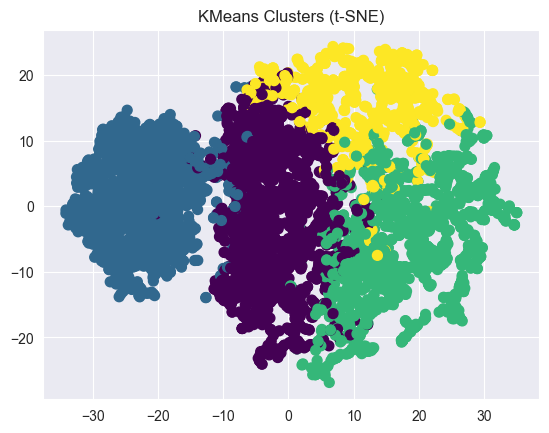

In [206]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=clusters_kmeans, cmap="viridis", s=50)
plt.title("KMeans Clusters (t-SNE)")
plt.show()

In [207]:
# DataFrame
df_tsne = pd.DataFrame({
    'tsne1': X_tsne[:, 0],
    'tsne2': X_tsne[:, 1],
    'tsne3': X_tsne[:, 2],
    'label': y_train
})

# Etkileşimli 3B scatter plot
fig = px.scatter_3d(df_tsne, x='tsne1', y='tsne2', z='tsne3',
                    color=clusters_kmeans,
                    title='3 Boyutlu t-SNE Görselleştirmesi',
                    labels={'tsne1': 't-SNE Boyut 1',
                            'tsne2': 't-SNE Boyut 2',
                            'tsne3': 't-SNE Boyut 3'},
                    color_continuous_scale='viridis')

fig.update_layout(
    width=500,  # piksel cinsinden genişlik
    height=500, # piksel cinsinden yükseklik
    autosize=False  # otomatik boyutlandırmayı kapat
)


fig.show()

DBSCAN

In [208]:
min_samples=4
neigh = NearestNeighbors(n_neighbors=min_samples)
distances, indices = neigh.fit(X_train).kneighbors(X_train)

# En yakın min_samples'inci komşunun mesafelerini sıralama
distances = np.sort(distances[:, min_samples - 1], axis=0)

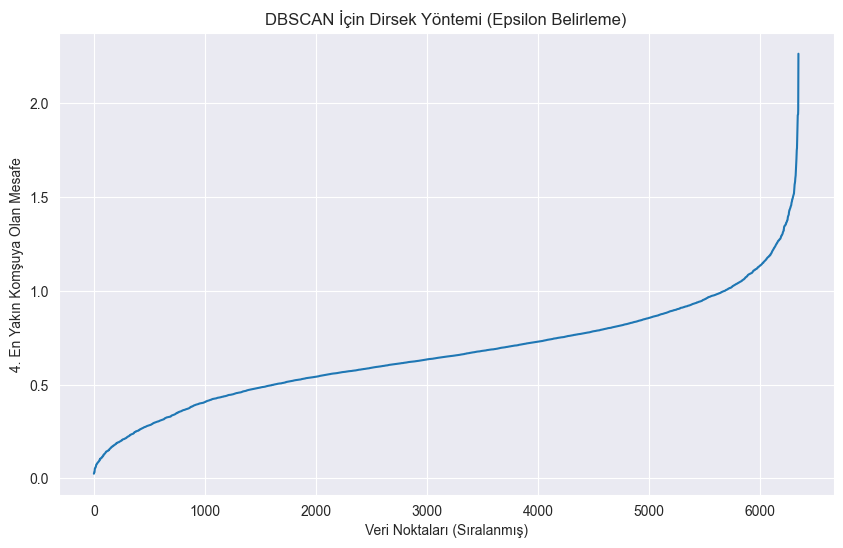

In [209]:
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel("Veri Noktaları (Sıralanmış)")
plt.ylabel(f"{min_samples}. En Yakın Komşuya Olan Mesafe")
plt.title("DBSCAN İçin Dirsek Yöntemi (Epsilon Belirleme)")
plt.grid(True)
plt.show()

In [210]:
dbscan = DBSCAN(eps=0.6, min_samples=6)
clusters = dbscan.fit_predict(X_train)

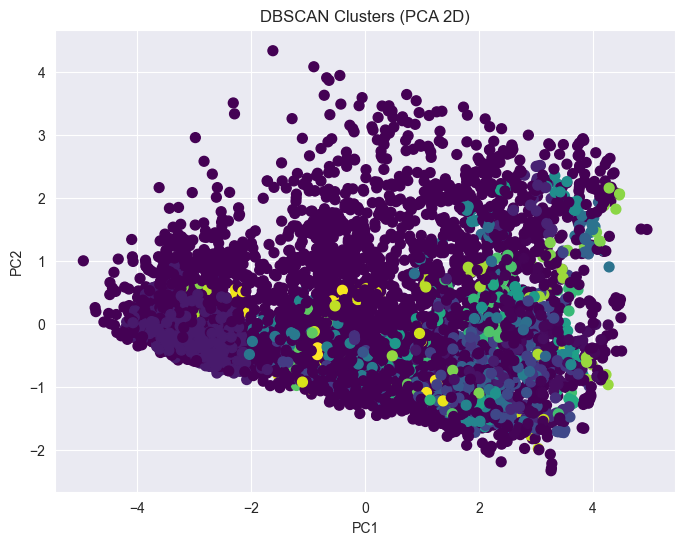

In [211]:
#PCA GÖRSELLEŞTİRME
plt.figure(figsize=(8,6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=clusters, cmap="viridis", s=50)
plt.title("DBSCAN Clusters (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [212]:
skor = silhouette_score(X_train, clusters)
print(skor)

-0.3236162661040155


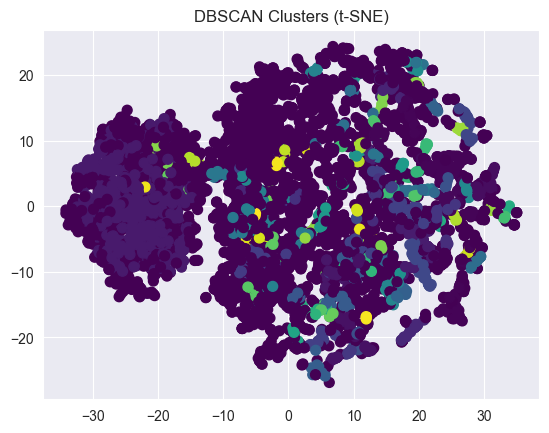

In [213]:
#TSNE GÖRSELLEŞTİRME
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=clusters, cmap="viridis", s=50)
plt.title("DBSCAN Clusters (t-SNE)")
plt.show()

In [214]:
# DataFrame
df_tsne = pd.DataFrame({
    'tsne1': X_tsne[:, 0],
    'tsne2': X_tsne[:, 1],
    'tsne3': X_tsne[:, 2],
    'label': y_train
})

# Etkileşimli 3B scatter plot
fig = px.scatter_3d(df_tsne, x='tsne1', y='tsne2', z='tsne3',
                    color=clusters,
                    title='3 Boyutlu t-SNE Görselleştirmesi',
                    labels={'tsne1': 't-SNE Boyut 1',
                            'tsne2': 't-SNE Boyut 2',
                            'tsne3': 't-SNE Boyut 3'},
                    color_continuous_scale='viridis')

fig.update_layout(
    width=500,  # piksel cinsinden genişlik
    height=500, # piksel cinsinden yükseklik
    autosize=False  # otomatik boyutlandırmayı kapat
)


fig.show()

HDBSCAN

In [215]:
hdbscan = HDBSCAN(min_samples=6)
h_clusters = hdbscan.fit_predict(X_train)

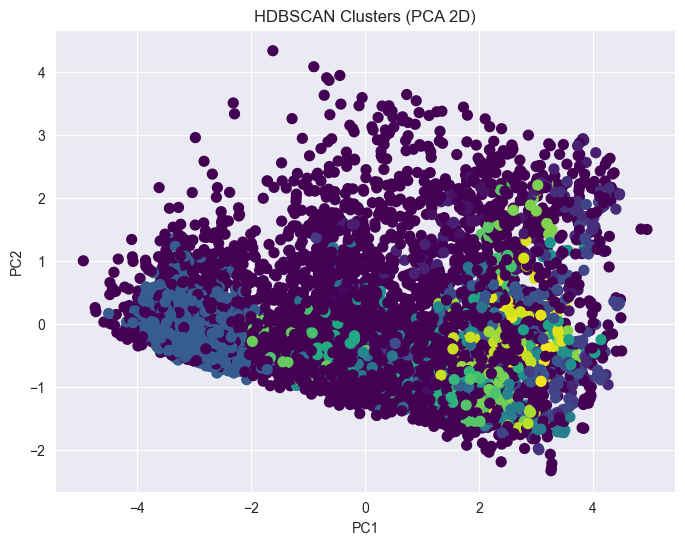

In [216]:
#PCA GÖRSELLEŞTİRME
plt.figure(figsize=(8,6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=h_clusters, cmap="viridis", s=50)
plt.title("HDBSCAN Clusters (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [217]:
skor = silhouette_score(X_train, h_clusters)
print(skor)

-0.2578503843504086


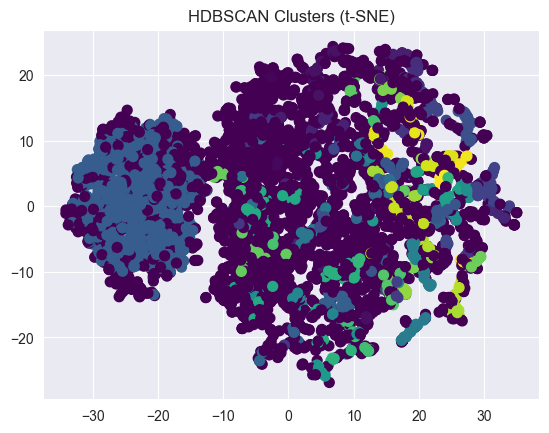

In [218]:
#TSNE GÖRSELLEŞTİRME
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=h_clusters, cmap="viridis", s=50)
plt.title("HDBSCAN Clusters (t-SNE)")
plt.show()


In [219]:
# DataFrame
df_tsne = pd.DataFrame({
    'tsne1': X_tsne[:, 0],
    'tsne2': X_tsne[:, 1],
    'tsne3': X_tsne[:, 2],
    'label': y_train
})

# Etkileşimli 3B scatter plot
fig = px.scatter_3d(df_tsne, x='tsne1', y='tsne2', z='tsne3',
                    color=h_clusters,
                    title='3 Boyutlu t-SNE Görselleştirmesi',
                    labels={'tsne1': 't-SNE Boyut 1',
                            'tsne2': 't-SNE Boyut 2',
                            'tsne3': 't-SNE Boyut 3'},
                    color_continuous_scale='viridis')

fig.update_layout(
    width=500,  # piksel cinsinden genişlik
    height=500, # piksel cinsinden yükseklik
    autosize=False  # otomatik boyutlandırmayı kapat
)


fig.show()

In [220]:
"""
YAPILACAKLAR:
2)genel inceleme özellikle değişken isimleri
3)hangi işlem hangi parametreyi
"""

'\nYAPILACAKLAR:\n2)genel inceleme özellikle değişken isimleri\n3)hangi işlem hangi parametreyi\n'

In [223]:
models = {
   'Logistic Regression': {'MAE': mae_lr},
   'Decision Tree': {'MAE': mae_dt},
   'Random Forest': {'MAE': mae_rf},
   'SVM': {'MAE': mae_svc},
   'KNN': {'MAE': mae_knn}
}

In [224]:
for i in models:
    print(f"Model {i}: {models[i]}")

best_model = min(models.items(), key=lambda x: x[1]['MAE'])[0]
print(f"En iyi: {best_model} ama KNN'de çok yakın")

Model Logistic Regression: {'MAE': 0.15680100755667506}
Model Decision Tree: {'MAE': 0.10579345088161209}
Model Random Forest: {'MAE': 0.04345088161209068}
Model SVM: {'MAE': 0.039672544080604534}
Model KNN: {'MAE': 0.04219143576826197}
En iyi: SVM ama KNN'de çok yakın


In [222]:
#kmeans'te LDA daha iyi sonuç verdi. diğer modellerin de başarısı genelde daha iyidi
